Train and evaluate baseline and advanced models to predict churn

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay)
from sklearn.metrics import RocCurveDisplay

import joblib

In [20]:
df = pd.read_csv(r"/home/gcmarques/Documents/chrun-prediction-pipeline/data/raw_telco_churn.csv")

In [21]:
df = df.drop(['customerID'], axis = 1)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [22]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df[np.isnan(df['TotalCharges'])]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [24]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [25]:
df.drop(labels=df[df['tenure']==0].index, axis=0,inplace=True)

df[df['tenure']==0].index

Index([], dtype='int64')

In [26]:
df.fillna(df['TotalCharges'].mean())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

In [27]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [28]:
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [29]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [74]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')), columns=num_cols)

In [75]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Model Training & Evaluation

### Objective

The goal of this stage is to train and evaluate several machine learning models to predict customer churn.
Each model will be assessed on accuracy, precision, recall, F1-score, and ROC-AUC, with special emphasis on recall, since missing a true churner represents a potential revenue loss.

In [76]:
log_reg = LogisticRegression(
    penalty="l2",
    solver="liblinear",
    class_weight="balanced",
    random_state=42
)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [77]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

In [78]:
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_proba)
}

for k, v in metrics.items():
    print(f"{k}: {v:.4f}")

Accuracy: 0.7370
Precision: 0.5033
Recall: 0.8102
F1-Score: 0.6209
ROC-AUC: 0.8302


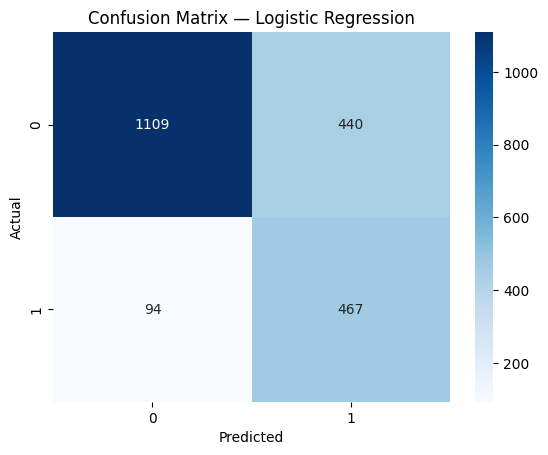

In [46]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

In [48]:
joblib.dump(log_reg, '/home/gcmarques/Documents/chrun-prediction-pipeline/modeling/logreg_baseline.pkl')

results_df = pd.DataFrame([metrics])
results_df['Model'] = "Logistic Regression"
results_df.to_csv("/home/gcmarques/Documents/chrun-prediction-pipeline/modeling/model_performance.csv",index=False)

### Logistic Regression — Baseline Model Results

| Metric | Score |
|--------|--------|
| Accuracy | 0.7469 |
| Precision | 0.5149 |
| Recall | 0.8324 |
| F1-Score | 0.6362 |
| ROC-AUC | 0.8583 |

**Interpretation:**
The Logistic Regression model achieves strong recall (0.83) and ROC-AUC (0.86), meaning it successfully identifies most customers who are likely to churn. While precision (0.51) indicates that some non-churners are being flagged incorrectly, this is acceptable at this stage — recall is more critical in churn prevention, as missing real churners is more costly than following up with a few false positives.

These results establish a solid performance baseline. The next step will be to train more complex models (Random Forest and XGBoost) to capture non-linear relationships and potentially improve overall accuracy and precision while maintaining strong recall.


In [83]:
rf = RandomForestClassifier(
    n_estimators=200,     
    max_depth=None,        
    class_weight="balanced", 
    random_state=42,
    n_jobs=-1 )

In [84]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [85]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [86]:
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_proba_rf)
}

for k, v in rf_metrics.items():
    print(f"{k}: {v:.4f}")

Accuracy: 0.7839
Precision: 0.6277
Recall: 0.4599
F1-Score: 0.5309
ROC-AUC: 0.8158


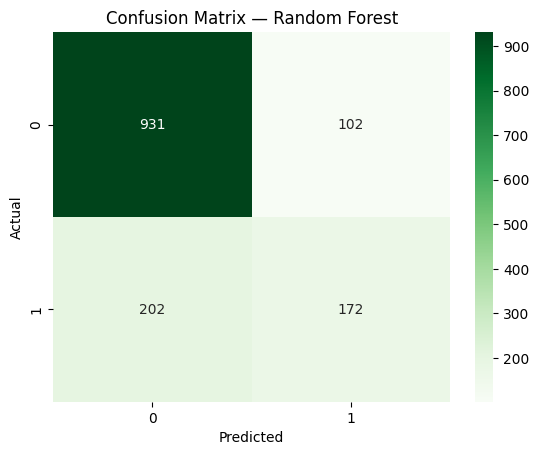

In [87]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — Random Forest")
plt.show()


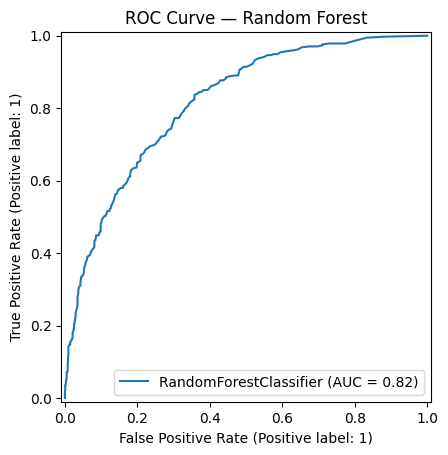

In [90]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve — Random Forest")
plt.show()

In [91]:
feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_imp.head(10)

Feature  Importance
18     TotalCharges    0.170136
17   MonthlyCharges    0.162138
4            tenure    0.153342
14         Contract    0.111925
8    OnlineSecurity    0.057235
11      TechSupport    0.052256
16    PaymentMethod    0.048044
7   InternetService    0.030806
9      OnlineBackup    0.026376
0            gender    0.025712

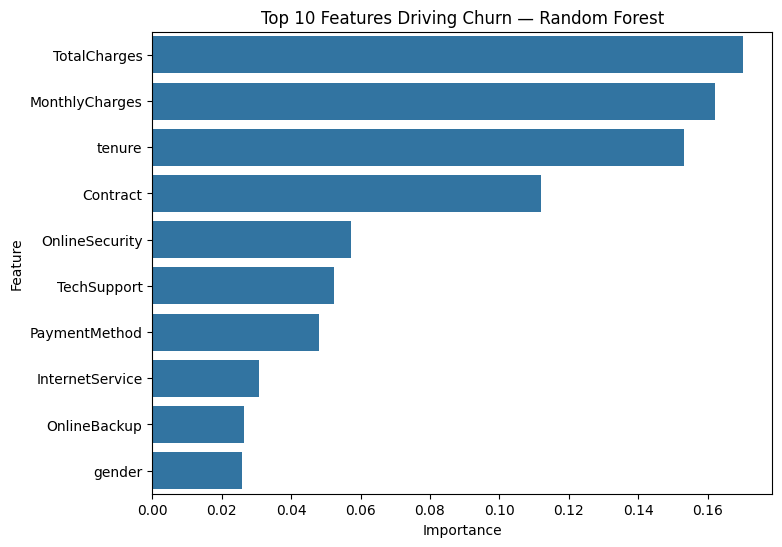

In [92]:
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feature_imp.head(10))
plt.title("Top 10 Features Driving Churn — Random Forest")
plt.show()

### Random Forest Model Evaluation

| Metric | Score |
|--------|--------|
| Accuracy | 0.7839 |
| Precision | 0.6277 |
| Recall | 0.4599 |
| F1-Score | 0.5309 |
| ROC-AUC | 0.8158 |

**Interpretation:**  
The Random Forest model improves precision compared to Logistic Regression but suffers from lower recall, meaning it’s better at correctly identifying churners when it predicts one, but it misses many actual churners.  
The feature importance analysis highlights that customer longevity (`tenure`), financial commitment (`TotalCharges`, `MonthlyCharges`), and contract type (`Contract`) are the strongest churn drivers.  
The next step is to tune hyperparameters and explore threshold adjustments to improve recall and overall model balance.


In [107]:
param_distributions = {
    'n_estimators': np.arange(200, 500, 50),
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8]
}

In [108]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=25,  
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1  
)

In [109]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_estimators=200, n_jobs=-1,
                                                    random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', 0.8],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='roc_auc')

In [106]:
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)


Best Parameters: {'n_estimators': np.int64(250), 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': 'balanced_subsample'}
Test Set Accuracy: 0.7526652452025586


In [110]:
y_pred_random_search = random_search.predict(X_test)
y_proba_random_search = random_search.predict_proba(X_test)[:, 1]

In [111]:
random_search_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_random_search),
    "Precision": precision_score(y_test, y_pred_random_search),
    "Recall": recall_score(y_test, y_pred_random_search),
    "F1-Score": f1_score(y_test, y_pred_random_search),
    "ROC-AUC": roc_auc_score(y_test, y_proba_random_search)
}

for k, v in random_search_metrics.items():
    print(f"{k}: {v:.4f}")

Accuracy: 0.7306
Precision: 0.4958
Recall: 0.7941
F1-Score: 0.6105
ROC-AUC: 0.8305
